# Multivariate Regression

Let's grab a small little data set of Blue Book car values:

In [1]:
import pandas as pd

df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')


In [2]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


We can use pandas to split up this matrix into the feature vectors we're interested in, and the value we're trying to predict.

Note how we use pandas.Categorical to convert textual category data (model name) into an ordinal number that we can work with.

In [3]:
import statsmodels.api as sm

df['Model_ord'] = pd.Categorical(df.Model).codes
X = df[['Mileage', 'Model_ord', 'Doors']]
y = df[['Price']]

X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     11.57
Date:                Sun, 24 Apr 2016   Prob (F-statistic):           1.98e-07
Time:                        15:16:59   Log-Likelihood:                -8519.1
No. Observations:                 804   AIC:                         1.705e+04
Df Residuals:                     800   BIC:                         1.706e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       3.125e+04   1809.549     17.272      0.000      2.77e+04  3.48e+04
Mileage       -0.1765      0.042     -4.227      0.000        -0.259    -0.095
Model_ord    -39.0387     39.326     -0.993      0.321      -116.234    38.157
Doors      -1652.9303    402.649     -4.105      0.000     -2443.303  -862.558
==============================================================================
Omnibus:                      206.410   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              470.872
Skew:                           1.379   Prob(JB):                    5.64e-103
Kurtosis:                       5.541   Cond. No.                     1.15e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
y.groupby(df.Doors).mean()

,Price
Doors,
2,23807.135520
4,20580.670749


Surprisingly, more doors does not mean a higher price! So it's not surprising that it's pretty useless as a predictor here. This is a very small data set however, so we can't really read much meaning into it.

## Activity

Mess around with the fake input data, and see if you can create a measurable influence of number of doors on price. Have some fun with it - why stop at 4 doors?

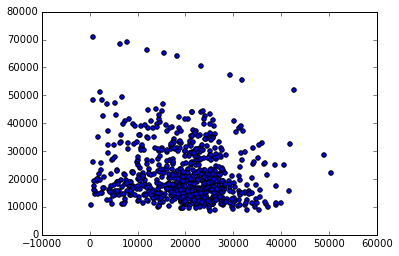

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

#df.describe(percentiles = [0, 0.25, 0.5, 0.75, 1])
plt.scatter(df['Mileage'], df['Price'])
plt.show()

In [16]:
X = df[['Mileage', 'Cruise', 'Cylinder', 'Leather', 'Doors', 'Liter']]
y = df[['Price']]

X1 = sm.add_constant(X)
est = sm.OLS(y, X1).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     103.4
Date:                Sun, 24 Apr 2016   Prob (F-statistic):           3.30e-96
Time:                        15:24:22   Log-Likelihood:                -8304.6
No. Observations:                 804   AIC:                         1.662e+04
Df Residuals:                     797   BIC:                         1.666e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4871.3678   1809.771      2.692      0.007      1318.888  8423.848
Mileage       -0.1664      0.032     -5.185      0.000        -0.229    -0.103
Cruise      6419.9096    661.503      9.705      0.000      5121.415  7718.404
Cylinder    3982.9351    685.742      5.808      0.000      2636.862  5329.008
Leather     3012.5935    593.942      5.072      0.000      1846.719  4178.469
Doors      -1500.5614    322.461     -4.653      0.000     -2133.535  -867.588
Liter       -965.4714    871.592     -1.108      0.268     -2676.359   745.416
==============================================================================
Omnibus:                      120.557   Durbin-Watson:                   0.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.647
Skew:                           1.010   Prob(JB):                     1.32e-40
Kurtosis:                       4.184   Cond. No.                     1.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""